# Movie Subtitles Analysis
This notebook provides an analysis of movie subtitles based on Kaggle dataset publically available for everyone.

The dataset contains movie subtitles for popular movies across multiple languages, with metadata extracted from IMDB.
The full dataset can be referenced directly via: https://www.kaggle.com/datasets/adiamaan/movie-subtitle-dataset


In [2]:
! pip uninstall bson -y && pip uninstall pymongo -y &&  pip install pymongo

Keyring is skipped due to an exception: 'keyring.backends'
Keyring is skipped due to an exception: 'keyring.backends'
Keyring is skipped due to an exception: 'keyring.backends'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.5/484.5 kB 6.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 4.8 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Move Subtitles Data Analysis

In [4]:
# srt_df = pd.read_csv("data/movies_subtitles.csv")
# metadata_df = pd.read_csv("data/movies_meta.csv")
srt_df = pd.read_csv("s3://sagemaker-us-east-1-602900100639/data/imdb/movies/movies_subtitles.csv")
metadata_df = pd.read_csv("s3://sagemaker-us-east-1-602900100639/data/imdb/movies/movies_meta.csv")

In [6]:
srt_df.head()

,start_time,end_time,text,imdb_id
0,58.559,61.602,"BOY: All right, everyone!\nThis... is a stick-up!",tt0114709
1,61.687,63.354,Don't anybody move!,tt0114709
2,64.398,66.482,"Now, empty that safe!",tt0114709
3,68.318,71.612,"Ooh-hoo-hoo!\nMoney, money, money! (KISSING)",tt0114709
4,71.697,74.031,"Stop it! Stop it,\nyou mean, old potato!",tt0114709


In [7]:
print(f"Movie Subtitle dataset contains: {srt_df.shape[0]} rows")

Movie Subtitle dataset contains: 10358496 rows


# Movie Metadata Data Analysis

In [8]:
metadata_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
3,False,NaN,3600000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.mgm.com/title_title.do?title_star=L...,451,tt0113627,en,Leaving Las Vegas,"Ben Sanderson, an alcoholic Hollywood screenwr...",...,1995-10-27,49800000.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,I Love You... The Way You Are.,Leaving Las Vegas,False,7.1,365.0
4,False,NaN,29500000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,63,tt0114746,en,Twelve Monkeys,"In the year 2035, convict James Cole reluctant...",...,1995-12-29,168840000.0,129.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The future is history.,Twelve Monkeys,False,7.4,2470.0


## Movie Subtitle  Language Distributions

In [9]:
%matplotlib inline

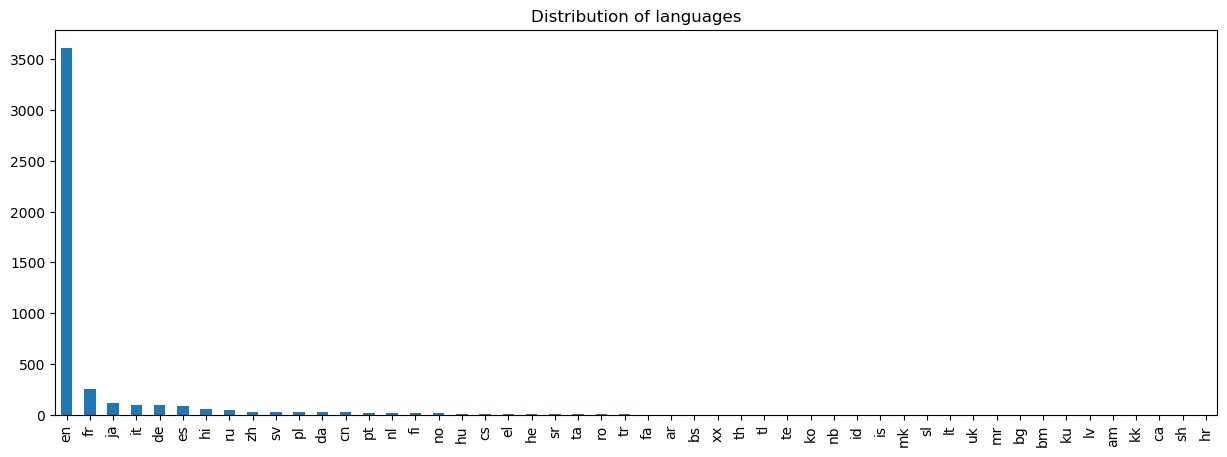

In [10]:
metadata_df['original_language'].value_counts().plot(kind='bar', figsize=(15, 5), title="Distribution of languages" )

# Movie Genre Distribution Analysis

In [11]:
import json
metadata_df['genres_dict'] =metadata_df['genres'].map(lambda x: x.replace("'", '"')).map(lambda x: json.loads(x))
genres_list_df = metadata_df['genres'].map(lambda x: x.replace("'", '"')).map(lambda x: json.loads(x))
genres_list = genres_list_df.values
all_genres = set([ y['name'] for genres in genres_list for y in genres])
print(f"All genres detected in the metadata: {all_genres}")

All genres detected in the metadata: {'Fantasy', 'History', 'Western', 'Adventure', 'Animation', 'Documentary', 'Science Fiction', 'War', 'Crime', 'Action', 'Drama', 'Romance', 'Family', 'Comedy', 'Music', 'TV Movie', 'Horror', 'Thriller', 'Foreign', 'Mystery'}


In [12]:
for genre in all_genres:
    metadata_df[genre] = metadata_df['genres_dict'].apply(lambda x: 1 if genre in [ y['name'] for y in x ] else 0)

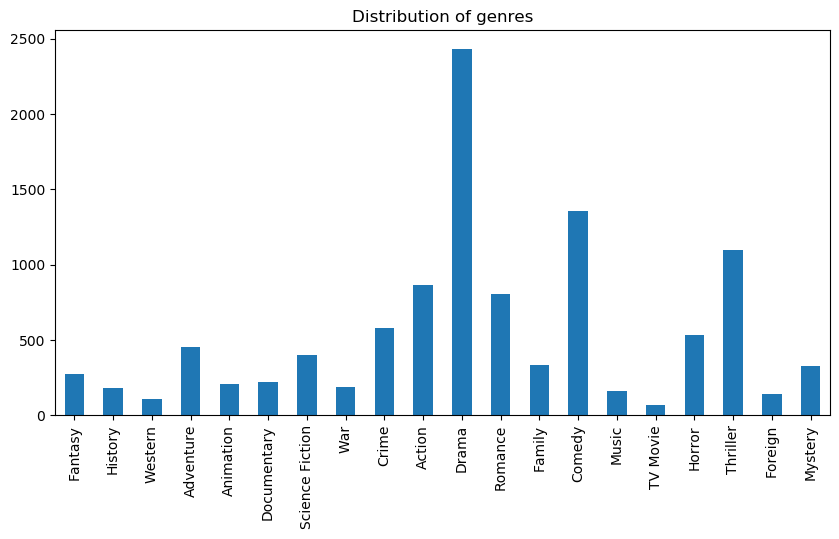

In [13]:
metadata_df[all_genres].sum().plot(kind='bar', title="Distribution of genres", figsize=(10,5))

# Prepare Movie Subtitles Dataset

1. concatenate all subtitles for each into a row in a table in pandas dataframe.
2. Saves the table into a CSV file.

In [14]:
grouped_df = srt_df.groupby(by=['imdb_id'])['text'].apply(list)
grouped_df = grouped_df.reset_index()
grouped_df.head()

,imdb_id,text
0,tt0002130,"[Downloaded from\nYTS.MX, Official YIFY movies..."
1,tt0005044,"[I smell fish., You might wanna take\nyour hee..."
2,tt0005059,"[<i>And all I have to do today</i>, <i>Is get ..."
3,tt0005060,"[Τhis film was shot, on location in Αndalucia,..."
4,tt0007338,"[Head caught to the left., Partial deafness in..."


In [15]:
os.makedirs("files", exist_ok = True)
for index, row in grouped_df.iterrows():
    imdb_id, text_list = row['imdb_id'], row['text']
    text = ''.join([str(x) for x in text_list[2:]]) # delete the first 2 lines as they come in as headings
    
    with open(f"files/{imdb_id}.txt", "w") as f:
        f.write(text)

## Amazon Comprehend Document Processing Modes
Amazon Comprehend supports three document processing modes:

* Single-document synchronous – You call Amazon Comprehend with a single document and receive a synchronous response, delivered to your application (or the console) right away.

* Multi-document synchronous – You call the Amazon Comprehend API with a collection of up to 25 documents and receive a synchronous response.

* Asynchronous batch – For a large collection of documents, put the documents into an Amazon S3 bucket and start an asynchronous job (using console or API operations) to analyze the documents. Amazon Comprehend stores the results of the analysis in the S3 bucket/folder that you specify in the request.

# Working With  Amazon Comprehend
The following section walks through how you could gather some insights from the given movie subtitles and metadata using Machine Learning service Amazon Comprehend.
Specfically, we would like to use Comprehend to perform the following tasks: 
    
1. Automatically group movies into topics based on the provided subtitles.
2. Train a custom classfier, deploy an endpoint and perform inference to predict the move genre based on the input movie subtitles.
3. Perform Sentiment Analysis and Targeted Sentiment Analysis on the movie overview data
4. Performs Key Phrases detection on the moview overview data

# Create A Topic Modeling job
You can use Amazon Comprehend to examine the content of a collection of documents to determine common themes. For example, you can give Amazon Comprehend a collection of news articles, and it will determine the subjects, such as sports, politics, or entertainment. The text in the documents doesn't need to be annotated.

Amazon Comprehend uses a Latent dirichlet allocation-based learning model to determine the topics in a set of documents. It examines each document to determine the context and meaning of a word. The set of words that frequently belong to the same context across the entire document set make up a topic.

In [17]:
import boto3
import json
from bson import json_util
import sagemaker
from os import listdir

In [18]:
session = sagemaker.session.Session()
default_bucket = session.default_bucket()
s3_document_upload_prefix = "data/comprehend/subtitles" 
comprehend = boto3.client('comprehend')
s3_document_topic_modeling_output_prefix = "data/comprehend/subtitles-topic-modeling-output"
input_s3_url = f"s3://{default_bucket}/{s3_document_upload_prefix}"
input_doc_format = "ONE_DOC_PER_FILE"
output_s3_url = f"s3://{default_bucket}/{s3_document_topic_modeling_output_prefix}"
data_access_role_arn = "arn:aws:iam::602900100639:role/AmazonComprehendDefaultRole"
s3 = boto3.client('s3')

# Upload files to S3
Essentially we are going to iterate through all the files and invoke boto3 library function to upload to S3.

In [19]:
import glob

for file in glob.glob(os.path.join("files", '*.txt')):
    with open(file, "rb") as f:
        s3.upload_fileobj(f, default_bucket, os.path.join(s3_document_upload_prefix, os.path.basename(file)))

In [19]:
# We need to provide a number of topics as one of the prarameters to Topic Modeling job. For demo purposes, we will use the same number of unique genres recorded in the 
# metadata file as the number of topics.
number_of_topics = len(all_genres)

In [20]:
from datetime import datetime

input_data_config = {"S3Uri": input_s3_url, "InputFormat": input_doc_format}
output_data_config = {"S3Uri": output_s3_url}
now = datetime.now()
job_name = f"MovieSubtitleTopicModelingJob-{now.strftime('%Y%m%d%H%M%S')}"
start_topics_detection_job_result = comprehend.start_topics_detection_job(NumberOfTopics=number_of_topics,
                                                                          InputDataConfig=input_data_config,
                                                                          OutputDataConfig=output_data_config,
                                                                          DataAccessRoleArn=data_access_role_arn,
                                                                          JobName=job_name)

In [42]:
print('start_topics_detection_job_result: ' + json.dumps(start_topics_detection_job_result))
job_id = start_topics_detection_job_result["JobId"]
print('job_id: ' + job_id)
describe_topics_detection_job_result = comprehend.describe_topics_detection_job(JobId=job_id)
print('describe_topics_detection_job_result: ' + json.dumps(describe_topics_detection_job_result, default=json_util.default))
list_topics_detection_jobs_result = comprehend.list_topics_detection_jobs()
print('list_topics_detection_jobs_result: ' + json.dumps(list_topics_detection_jobs_result, default=json_util.default))

start_topics_detection_job_result: {"JobId": "33f646286d3453ab5d5c80347f5ceecb", "JobArn": "arn:aws:comprehend:us-east-2:869530972998:topics-detection-job/33f646286d3453ab5d5c80347f5ceecb", "JobStatus": "SUBMITTED", "ResponseMetadata": {"RequestId": "49336c48-f309-4246-8064-6318d880f333", "HTTPStatusCode": 200, "HTTPHeaders": {"x-amzn-requestid": "49336c48-f309-4246-8064-6318d880f333", "content-type": "application/x-amz-json-1.1", "content-length": "175", "date": "Tue, 10 Jan 2023 16:28:54 GMT"}, "RetryAttempts": 0}}
job_id: 33f646286d3453ab5d5c80347f5ceecb
describe_topics_detection_job_result: {"TopicsDetectionJobProperties": {"JobId": "33f646286d3453ab5d5c80347f5ceecb", "JobArn": "arn:aws:comprehend:us-east-2:869530972998:topics-detection-job/33f646286d3453ab5d5c80347f5ceecb", "JobName": "MovieSubtitleTopicModelingJob", "JobStatus": "IN_PROGRESS", "SubmitTime": {"$date": "2023-01-10T16:28:54.382Z"}, "InputDataConfig": {"S3Uri": "s3://sagemaker-us-east-2-869530972998/data/comprehend/s

In [43]:
job_id = "b8f5577f62651966fe3eca7e845e0e1d"

In [44]:
import time
while True:
    describe_topics_detection_job_result = comprehend.describe_topics_detection_job(JobId=job_id)
    status = describe_topics_detection_job_result['TopicsDetectionJobProperties']['JobStatus']
    if status.lower() in ['completed', 'failed', 'stop_requested', 'stopped']:
        print(f"job is stopped with status: {status}")  
        print(f"job output: {describe_topics_detection_job_result['TopicsDetectionJobProperties']['OutputDataConfig']['S3Uri']}")
        break
    print(f"job status: {status}")
    time.sleep(5)


job is stopped with status: COMPLETED
job output: s3://sagemaker-us-east-2-869530972998/data/comprehend/subtitles-topic-modeling-output/869530972998-TOPICS-b8f5577f62651966fe3eca7e845e0e1d/output/output.tar.gz


# Analyze Topics From the Topic Modeling Job

After Amazon Comprehend processes your document collection, it returns a compressed archive containing two files, topic-terms.csv and doc-topics.csv.

The first output file, topic-terms.csv, is a list of topics in the collection. For each topic, the list includes, by default, the top terms by topic according to their weight. For example, if you give Amazon Comprehend a collection of newspaper articles, it might return the following to describe the first two topics in the collection

![image.png](imgs/topic-terms-example.png)

The second file, doc-topics.csv, lists the documents associated with a topic and the proportion of the document that is concerned with the topic. If you specified 
For example, Amazon Comprehend might return the following for a collection of documents submitted with one document per file:

![image.png](imgs/doc-topic-example.png)
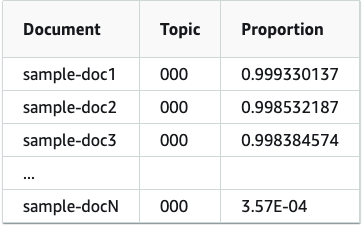

In [45]:
topics_df = pd.read_csv("results/topic_modeling/doc-topics.csv")

In [46]:
topics_df.head()

,docname,topic,proportion
0,tt0131646.txt,0,0.454020
1,tt0131646.txt,4,0.398444
2,tt0131646.txt,11,0.079688
3,tt0131646.txt,3,0.067847
4,tt0972785.txt,0,0.952213


In [47]:
topic_term_df = pd.read_csv("results/topic_modeling/topic-terms.csv")

In [55]:
topic_term_df[ topic_term_df['topic'] == 0]

,topic,term,weight
0,0,gonna,0.017092
1,0,hey,0.008463
2,0,back,0.007481
3,0,make,0.007225
4,0,yes,0.012454
5,0,good,0.007404
6,0,guy,0.006129
7,0,thing,0.004943
8,0,gotta,0.004104
9,0,time,0.005305


### As part of the analysis, we would like to see the top 5 movies that are grouped into a topic. 

In [56]:
topics = topics_df['topic'].unique()

for topic in topics:
    top_movies_by_topic_df = topics_df[topics_df['topic'] == topic].sort_values(by='proportion', ascending=False)['docname'][:5].values
    top_movies_by_topic_imdb_ids = [ x.split(".")[0] for x in top_movies_by_topic_df]
    top_movies_by_topic = []
    for imdb_id in top_movies_by_topic_imdb_ids:
        top_movies_by_topic.append((metadata_df[ metadata_df['imdb_id'] == imdb_id]['title'].values[0]))
    print(f"topic: {topic}, top movies: {top_movies_by_topic}")    

topic: 0, top movies: ['Fantasma', 'Beneath', 'Zathura: A Space Adventure', 'Locked In', 'Runner Runner']
topic: 4, top movies: ['Layer Cake', 'Inferno', 'The Descent', 'Miracle at St. Anna', 'The Guest']
topic: 11, top movies: ['Un chien andalou', 'The Book of Life', 'The Book of Life', 'El Topo', 'Clear and Present Danger']
topic: 3, top movies: ['The Mummy', 'The Mummy', 'The Mummy', 'The Rundown', 'Caged Heat']
topic: 2, top movies: ['While the City Sleeps', 'Paris by Night of the Living Dead', 'While the City Sleeps', 'The Messiah', 'The Sheik']
topic: 13, top movies: ["Red's Dream", 'Paperman', 'Comedy Central Roast of Denis Leary', 'The Pact II', 'The Sinful Dwarf']
topic: 1, top movies: ['All About the Benjamins', 'The Mighty Angel', 'Phantom Halo', 'Ransom', 'Cold in July']
topic: 9, top movies: ['The Golden Cane Warrior', 'Guilty by Suspicion', 'The Wiz', 'Need for Speed', 'Resident Evil: Apocalypse']
topic: 10, top movies: ['Dinner for One', 'Brutal Relax', 'Three Days', 'Th

In [57]:
topic_terms_df = pd.read_csv("results/topic_modeling/topic-terms.csv")

In [58]:
for topic in topics:
    top_terms_by_topic_df = topic_terms_df[topic_terms_df['topic'] == topic].sort_values(by='weight', ascending=False)['term'][:5].values
    print(f"topic: {topic}, top 5 terms: {top_terms_by_topic_df}")    

topic: 0, top 5 terms: ['gonna' 'yes' 'hey' 'back' 'good']
topic: 4, top 5 terms: ['color' 'fefefe' 'd900d9' 'fff65b' 'trebuchet']
topic: 11, top 5 terms: ['fefefe' 'sir' 'trebuchet' 'dddd00' 'good']
topic: 3, top 5 terms: ['kill' 'love' 'live' 'find' 'save']
topic: 2, top 5 terms: ['love' 'live' 'make' 'kill' 'feel']
topic: 13, top 5 terms: ['music' 'play' 'melodious' 'continue' 'applause']
topic: 1, top 5 terms: ['fuck' 'gonna' 'yes' 'shit' 'guy']
topic: 9, top 5 terms: ['color' 'fefefe' 'fff65b' 'trebuchet' 'dddd00']
topic: 10, top 5 terms: ['d900d9' 'world' 'friend' 'damn' 'pass']
topic: 14, top 5 terms: ['speak' 'call' 'tell' 'white' 'red']
topic: 8, top 5 terms: ['color' 'd900d9' 'narbe' 'music' 'play']
topic: 17, top 5 terms: ['laugh' 'andré' 'grunt' 'gasp' 'buzz']
topic: 5, top 5 terms: ['yes' 'friend' 'hey' 'wrong' 'cop']
topic: 12, top 5 terms: ['color' 'ffff00' '80ff00' 'lieutenant' 'thing']
topic: 6, top 5 terms: ['world' 'friend' 'big' 'damn' 'pass']
topic: 19, top 5 terms

## Train A Custom Classifier
Use custom classification to organize your documents into categories (classes) that you define. Custom classification is a two-step process:
1. Train a custom classification model (also called a classifier) to recognize the classes that are of interest to you. 
2. Use the trained model to classify any number of document sets

For example, you can categorize the content of support requests so that you can route the request to the proper support team. Or you can categorize emails received from customers to provide guidance on the requests that customers are making. You can combine Amazon Comprehend with Amazon Transcribe to convert speech to text and then to classify the requests coming from support phone calls.

You can classify your documents using two modes: multi-class or multi-label. 

In this example, we will use the metadata dataset as the source of our input features. Since each movie could have more than 1 genre, we are going to train a model that could predict multi genres based on the overview of each movie.

You can run custom classification on a single document synchronously (in real-time) or start an asynchronous job to classify a set of documents. Custom classification accepts a variety of input document types: plain text documents, semi-structured documents, image files, and Amazon Textract ouput files.




In [59]:
metadata_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,Western,Crime,Comedy,Foreign,History,War,Mystery,Documentary,Horror,Adventure
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,1,0,0,0,0,0,0,0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,0,0,0,0,0,0,0,0,0,1
2,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,0,0,0,0,0,0,0,0,0,1
3,False,NaN,3600000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.mgm.com/title_title.do?title_star=L...,451,tt0113627,en,Leaving Las Vegas,"Ben Sanderson, an alcoholic Hollywood screenwr...",...,0,0,0,0,0,0,0,0,0,0
4,False,NaN,29500000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,63,tt0114746,en,Twelve Monkeys,"In the year 2035, convict James Cole reluctant...",...,0,0,0,0,0,0,1,0,0,0


## Amazon comprehend custom classifier supports the following languages:
English, Spanish, French, German, Italian, Portuguese

For our example, we are interested training a custom classfier with movies in English.


In [60]:
en_metadata_df = metadata_df.loc[metadata_df['original_language'] == 'en']

In [61]:
en_metadata_df['delimited_genres'] = en_metadata_df['genres'].map(lambda x: x.replace("'", '"')) \
                                                             .map(lambda x: json.loads(x)) \
                                                             .apply(lambda x: [ y['name'] for y in x]) \
                                                             .apply(lambda x: "|".join(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [62]:
en_metadata_df = en_metadata_df[en_metadata_df['delimited_genres'] != ''] # drop the entries where genre is not defined.

In [63]:
classifcation_input_df = en_metadata_df[['delimited_genres', 'overview']]
shuffled_classifcation_input_df = classifcation_input_df.sample(frac=1, random_state=2042).reset_index(drop=True)
training_samples = int(shuffled_classifcation_input_df.shape[0] * .85)
training_input_df = shuffled_classifcation_input_df.loc[:training_samples, :]
val_input_df = shuffled_classifcation_input_df.loc[training_samples:, :]

In [64]:
val_input_df.head()

,delimited_genres,overview
3025,Drama|History|Romance,When Queen Elizabeth's reign is threatened by ...
3026,Adventure|Fantasy,"After overhearing a shocking secret, precociou..."
3027,Drama|Romance,The Newlyn School of artists flourished at the...
3028,Comedy|Crime,Sweet Revenge was originally shipped out as Da...
3029,Thriller|Horror|Mystery,A truck driver plays a cat-and-mouse game with...


In [65]:
print(f"training samples: {training_input_df.shape[0]}, validation samples: {val_input_df.shape[0]}")

training samples: 3026, validation samples: 534


In [66]:
os.makedirs("classification", exist_ok = True)
training_input_df.to_csv("classification/train.csv", header=False, index=False)
val_input_df.to_csv("classification/validation.csv", header=False, index=False)

## Upload train and validation files to S3

In [67]:
s3_document_for_classification_upload_prefix="data/comprehend/subtitle-classfications"
s3_document_for_classification_output_prefix="data/comprehend/subtitle-classfications-output"
s3_document_for_classification_analysis_output_prefix="data/comprehend/subtitle-classfications-analysis-output"

In [68]:
import glob

for file in glob.glob(os.path.join("classification", '*.csv')):
    with open(os.path.join(file), "rb") as f:
        s3.upload_fileobj(f, default_bucket, os.path.join(s3_document_for_classification_upload_prefix, os.path.basename(file)))

In [69]:
import time

create_response = comprehend.create_document_classifier(
    InputDataConfig={
        'S3Uri': f's3://{default_bucket}/{s3_document_for_classification_upload_prefix}/train.csv',
        'TestS3Uri': f's3://{default_bucket}/{s3_document_for_classification_upload_prefix}/validation.csv',
    },
    OutputDataConfig={
        'S3Uri': f's3://{default_bucket}/{s3_document_for_classification_output_prefix}'
    },
    DataAccessRoleArn=data_access_role_arn,
    DocumentClassifierName=f'MovieSubTitleClassification-{int(time.time())}',
    LanguageCode='en',
    Mode="MULTI_LABEL"
)
print("Create response: %s\n", create_response)

Create response: %s
 {'DocumentClassifierArn': 'arn:aws:comprehend:us-east-2:869530972998:document-classifier/MovieSubTitleClassification-1673368419', 'ResponseMetadata': {'RequestId': 'd7601684-cdd7-46ac-b50c-6e5056428d7b', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'd7601684-cdd7-46ac-b50c-6e5056428d7b', 'content-type': 'application/x-amz-json-1.1', 'content-length': '128', 'date': 'Tue, 10 Jan 2023 16:33:39 GMT'}, 'RetryAttempts': 0}}
Describe response: %s
 {'DocumentClassifierProperties': {'DocumentClassifierArn': 'arn:aws:comprehend:us-east-2:869530972998:document-classifier/MovieSubTitleClassification-1673368419', 'LanguageCode': 'en', 'Status': 'SUBMITTED', 'SubmitTime': datetime.datetime(2023, 1, 10, 16, 33, 39, 609000, tzinfo=tzlocal()), 'InputDataConfig': {'DataFormat': 'COMPREHEND_CSV', 'S3Uri': 's3://sagemaker-us-east-2-869530972998/data/comprehend/subtitle-classfications/train.csv', 'TestS3Uri': 's3://sagemaker-us-east-2-869530972998/data/comprehend/subtitl

KeyError: 'DocumentClassifierArn'

In [73]:
# Check the status of the classifier
describe_response = comprehend.describe_document_classifier(
    DocumentClassifierArn=create_response['DocumentClassifierArn'])

document_classfier_arn = create_response['DocumentClassifierArn']

# Deploy Custom Classification Model Endpoint

You can run custom classification on a single document synchronously (in real-time) or start an asynchronous job to classify a set of documents. Custom classification accepts a variety of input document types: plain text documents, semi-structured documents, image files, and Amazon Textract ouput files.

In [74]:
document_classfier_arn = "arn:aws:comprehend:us-east-2:869530972998:document-classifier/MovieSubTitleClassification-1670025843"

# Analyze Movie Genre Classfication in realtime 

You can use the Amazon Comprehend API to run real-time classification with a custom model. 
First, you create an endpoint to run the real-time analysis. After you create the endpoint, you run the real-time classification.

# Uncomment the following block to deploy an endpoint. 

In [75]:
# endpoint_name = f"MovieSubTitleClassification-{int(time.time())}"
# response = comprehend.create_endpoint(
#     EndpointName=endpoint_name,
#     ModelArn=create_response['DocumentClassifierArn'],
#     DesiredInferenceUnits=10,
#     DataAccessRoleArn=data_access_role_arn
# )
# print(response)
# endpoint_arn = response['EndpointArn']

# Run realtime classification

In [76]:
endpoint_arn = "arn:aws:comprehend:us-east-2:869530972998:document-classifier-endpoint/MovieSubTitleClassification-1670043537"

In [77]:
val_input_df.head()

,delimited_genres,overview
3025,Drama|History|Romance,When Queen Elizabeth's reign is threatened by ...
3026,Adventure|Fantasy,"After overhearing a shocking secret, precociou..."
3027,Drama|Romance,The Newlyn School of artists flourished at the...
3028,Comedy|Crime,Sweet Revenge was originally shipped out as Da...
3029,Thriller|Horror|Mystery,A truck driver plays a cat-and-mouse game with...


In [78]:
test_overview_string = val_input_df.loc[3025:3025, "overview"].values[0]

In [79]:
response = comprehend.classify_document(
    Text=test_overview_string,
    EndpointArn=endpoint_arn
)

In [80]:
response['Labels']

[{'Name': 'Drama', 'Score': 0.9926754832267761},
 {'Name': 'History', 'Score': 0.654626727104187},
 {'Name': 'Romance', 'Score': 0.4170531928539276}]

# Run Classification Analysis Job (Asynchronous)

After you create and train a custom document classifier, you can use the classifier to run analysis jobs.

Use the StartDocumentClassificationJob operation to start classifying unlabeled documents. You specify the S3 bucket that contains the input documents, the S3 bucket for the output documents, and the classifier to use.

StartDocumentClassificationJob is asynchronous. Once you have started the job, use the DescribeDocumentClassificationJob operation to monitor its progress. When the Status field in the response shows COMPLETED, you can access the output in the location that you specified.

In [503]:
start_response = comprehend.start_document_classification_job(
     JobName= f"MovieSubTitleClassification-{int(time.time())}"
     InputDataConfig={
         'S3Uri': f's3://{default_bucket}/{s3_document_for_classification_upload_prefix}/validation.csv',
         'InputFormat': 'ONE_DOC_PER_LINE'
     },
     OutputDataConfig={
         'S3Uri': f"s3://{default_bucket}/{s3_document_for_classification_analysis_output_prefix}"
     },
     DataAccessRoleArn=data_access_role_arn,
     DocumentClassifierArn=document_classfier_arn
 )
 
print("Start response: %s\n", start_response)
 
# Check the status of the job
describe_response = comprehend.describe_document_classification_job(JobId=start_response['JobId'])
print("Describe response: %s\n", describe_response)
 
# List all classification jobs in account
list_response = comprehend.list_document_classification_jobs()
print("List response: %s\n", list_response)

Start response: %s
 {'JobId': '8c01a8886e94cdd2c48d083fc78d93af', 'JobArn': 'arn:aws:comprehend:us-east-2:869530972998:document-classification-job/8c01a8886e94cdd2c48d083fc78d93af', 'JobStatus': 'SUBMITTED', 'ResponseMetadata': {'RequestId': '3e45e1f1-edbc-41ff-ba0c-604aceb16938', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '3e45e1f1-edbc-41ff-ba0c-604aceb16938', 'content-type': 'application/x-amz-json-1.1', 'content-length': '182', 'date': 'Sat, 03 Dec 2022 05:13:55 GMT'}, 'RetryAttempts': 0}}
Describe response: %s
 {'DocumentClassificationJobProperties': {'JobId': '8c01a8886e94cdd2c48d083fc78d93af', 'JobArn': 'arn:aws:comprehend:us-east-2:869530972998:document-classification-job/8c01a8886e94cdd2c48d083fc78d93af', 'JobStatus': 'SUBMITTED', 'SubmitTime': datetime.datetime(2022, 12, 3, 5, 13, 55, 708000, tzinfo=tzlocal()), 'DocumentClassifierArn': 'arn:aws:comprehend:us-east-2:869530972998:document-classifier/MovieSubTitleClassification-1670025843', 'InputDataConfig': {'S

# Sentiment Analysis
Use Amazon Comprehend to determine the sentiment of a document. For example, you can use sentiment analysis to determine the sentiments of comments on a blog posting to determine if your readers liked the post.

You can determine sentiment for documents in any of the primary languages supported by Amazon Comprehend. All documents in one job must be in the same language.

Sentiment determination returns the following values:

Positive – The text expresses an overall positive sentiment.

Negative – The text expresses an overall negative sentiment.

Mixed – The text expresses both positive and negative sentiments.

Neutral – The text does not express either positive or negative sentiments.

You can use any of the following API operations to detect the sentiment of a document or a set of documents.

Supported language codes: 'en', 'es', 'fr', 'de', 'it', 'pt', 'ar', 'hi', 'ja', 'ko', 'zh', 'zh-TW'

In [117]:
test_overview_string

"When Queen Elizabeth's reign is threatened by ruthless familial betrayal and Spain's invading army, she and her shrewd adviser must act to safeguard to the lives of her people."

In [115]:
response = comprehend.detect_sentiment(
    Text=test_overview_string,
    LanguageCode='en'
)

In [116]:
response

{'Sentiment': 'NEUTRAL',
 'SentimentScore': {'Positive': 0.006045124493539333,
  'Negative': 0.11982877552509308,
  'Neutral': 0.8739916682243347,
  'Mixed': 0.00013437209418043494},
 'ResponseMetadata': {'RequestId': 'c05c7743-c417-4ab6-94bf-133e8f99a391',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'c05c7743-c417-4ab6-94bf-133e8f99a391',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '164',
   'date': 'Mon, 05 Dec 2022 19:02:11 GMT'},
  'RetryAttempts': 0}}

# Batch Sentiment Detection
Inspects a batch of documents and returns an inference of the prevailing sentiment, POSITIVE, NEUTRAL, MIXED, or NEGATIVE, in each one.



In [132]:
# test_overview_string = val_input_df.loc[3025:3025, "overview"].values[0]
batch_sentiment_samples = val_input_df.sample(n=25)['overview'].values
#  [3025:3025, "overview"].values[0]

In [163]:
batch_sentiment_samples[7]

'Retirement at last! Middle-aged and divorced, company owner Richard Jones is looking forward to a worry-free existence as he arrives at his office on his last day of work. Much to his dismay, he discovers that the management buyout of his company was fraudulent. The company is now bankrupt and the employee pension fund — including his own — has been embezzled. Enlisting the help of his ex-wife Kate, Richard sets out to track down the shady businessman behind the fraud...'

In [133]:
for sample in batch_sentiment_samples:
    print(sample)

The life of a young computer systems analyst is thrown into turmoil after arriving in Istanbul to start a new job. She soon finds her passport missing, her credit cards useless, her bank account empty and her identity stolen. As the story progresses we find people and events may not be what they seem ...
A film producer who was adopted as a baby and sent to America, returns to her native Russia and the family farm. Once there, strange things begin to happen including the disappearance of her guide, the manifestation of ghosts (including her own!) and the appearance of another man who has been drawn to the farm for the same reasons.
A pregnant widow, believing herself to be guided by her unborn child, embarks on a homicidal rampage.
After arriving in India, Indiana Jones is asked by a desperate village to find a mystical stone. He agrees – and stumbles upon a secret cult plotting a terrible plan in the catacombs of an ancient palace.
Fiction inspired from the story of the rise and the f

In [136]:
response = comprehend.batch_detect_sentiment(
    TextList=list(batch_sentiment_samples),
    LanguageCode='en'
)

In [137]:
response

{'ResultList': [{'Index': 0,
   'Sentiment': 'NEUTRAL',
   'SentimentScore': {'Positive': 0.0013342387974262238,
    'Negative': 0.447750449180603,
    'Neutral': 0.5490082502365112,
    'Mixed': 0.0019070595735684037}},
  {'Index': 1,
   'Sentiment': 'NEUTRAL',
   'SentimentScore': {'Positive': 0.0006920453161001205,
    'Negative': 0.0019484956283122301,
    'Neutral': 0.9972878694534302,
    'Mixed': 7.158063090173528e-05}},
  {'Index': 2,
   'Sentiment': 'NEUTRAL',
   'SentimentScore': {'Positive': 0.005141110625118017,
    'Negative': 0.030108187347650528,
    'Neutral': 0.9642391800880432,
    'Mixed': 0.000511477526742965}},
  {'Index': 3,
   'Sentiment': 'NEUTRAL',
   'SentimentScore': {'Positive': 0.0027704350650310516,
    'Negative': 0.0198673103004694,
    'Neutral': 0.977347195148468,
    'Mixed': 1.5041312508401461e-05}},
  {'Index': 4,
   'Sentiment': 'NEUTRAL',
   'SentimentScore': {'Positive': 0.20060589909553528,
    'Negative': 0.0006644892855547369,
    'Neutral': 0

# Targeted Sentiment Analysis
Targeted sentiment provides a granular understanding of the sentiments associated with specific entities (such as brands or products) in your input documents.

The difference between targeted sentiment and sentiment is the level of granularity in the output data. 
Sentiment analysis determines the dominant sentiment for each input document, but doesn't provide data for further analysis. Targeted sentiment analysis determines the entity-level sentiment for specific entities in each input document. You can analyze the output data to determine the specific products and services that get positive or negative feedback.

Sentiment analysis determines whether the overall sentiment of each restaurant review is positive, negative, neutral, or mixed. In this example, the overall sentiment is positive.

Targeted sentiment analysis determines sentiment for entities and attributes of the restaurant that customers mention in the reviews. In this example, the customer made positive comments about “tacos” and “staff”.

Supported Entity Types

![image.png](imgs/targeted_sentiment_entity_types.png)


Targeted sentiment provides the following outputs for each analysis job:

* Identity of the entities mentioned in the documents.
* Classification of the entity type for each entity mention.
* The sentiment and a sentiment score for each entity mention.
* Groups of mentions (co-reference groups) that correspond to a single entity.


## In our example, we'll use the movie overviews as the input to detect targeted sentiment analysis

In [144]:
response = comprehend.detect_targeted_sentiment(
    Text=test_overview_string,
    LanguageCode='en'
)

In [2]:
response

NameError: name 'response' is not defined

# Detecting Key Phrases

A key phrase is a string containing a noun phrase that describes a particular thing. It generally consists of a noun and the modifiers that distinguish it. For example, "day" is a noun; "a beautiful day" is a noun phrase that includes an article ("a") and an adjective ("beautiful"). Each key phrase includes a score that indicates the level of confidence that Amazon Comprehend has that the string is a noun phrase. You can use the score to determine if the detection has high enough confidence for your application.

Detect key phrases operations can be performed using any of the primary languages supported by Amazon Comprehend. All documents must be in the same language.
You can use any of the following operations to detect key phrases in a document or set of documents.

For our example, we'll use Amazon Comprehend to extract key phrases on the movie overview content

In [147]:
test_overview_string

"When Queen Elizabeth's reign is threatened by ruthless familial betrayal and Spain's invading army, she and her shrewd adviser must act to safeguard to the lives of her people."

In [146]:
print('Calling DetectKeyPhrases')
print(json.dumps(comprehend.detect_key_phrases(Text=test_overview_string, LanguageCode='en'), sort_keys=True, indent=4))
print('End of DetectKeyPhrases\n')

Calling DetectKeyPhrases
{
    "KeyPhrases": [
        {
            "BeginOffset": 5,
            "EndOffset": 20,
            "Score": 0.999947726726532,
            "Text": "Queen Elizabeth"
        },
        {
            "BeginOffset": 23,
            "EndOffset": 28,
            "Score": 0.9999405741691589,
            "Text": "reign"
        },
        {
            "BeginOffset": 46,
            "EndOffset": 72,
            "Score": 0.9997791647911072,
            "Text": "ruthless familial betrayal"
        },
        {
            "BeginOffset": 77,
            "EndOffset": 82,
            "Score": 0.999193012714386,
            "Text": "Spain"
        },
        {
            "BeginOffset": 85,
            "EndOffset": 98,
            "Score": 0.9990389943122864,
            "Text": "invading army"
        },
        {
            "BeginOffset": 108,
            "EndOffset": 126,
            "Score": 0.9996461272239685,
            "Text": "her shrewd adviser"
        },
  

# Batch Key Phrase Detection

Detects the key noun phrases found in a batch of documents. The limit for a single batch is 25 documents.

In [162]:
response = comprehend.batch_detect_key_phrases(
    TextList=list(batch_sentiment_samples),
    LanguageCode='en'
)
# print(json.dumps(response, sort_keys=True, indent=4))
for idx, result in enumerate(response['ResultList']):
    key_phrases = [ x['Text'] for x in result['KeyPhrases']]
    text = batch_sentiment_samples[idx]
    print(f"TEXT: {text}")
    print(f"KEY_PHRASES: {key_phrases}")
    print(f"===========================================================================================================================================")

TEXT: The life of a young computer systems analyst is thrown into turmoil after arriving in Istanbul to start a new job. She soon finds her passport missing, her credit cards useless, her bank account empty and her identity stolen. As the story progresses we find people and events may not be what they seem ...
KEY_PHRASES: ['The life', 'a young computer systems analyst', 'turmoil', 'Istanbul', 'a new job', 'her passport', 'her credit cards', 'her bank account', 'her identity', 'the story', 'people and events']
TEXT: A film producer who was adopted as a baby and sent to America, returns to her native Russia and the family farm. Once there, strange things begin to happen including the disappearance of her guide, the manifestation of ghosts (including her own!) and the appearance of another man who has been drawn to the farm for the same reasons.
KEY_PHRASES: ['A film producer', 'a baby', 'America', 'her native Russia', 'the family farm', 'strange things', 'the disappearance', 'her guide'

In [167]:
s3_document_targeted_sentiment_analysis_upload_prefix = "data/comprehend/targeted-sentiment-analysis-input" 
s3_document_targeted_sentiment_analysis_output_prefix = "data/comprehend/targeted-sentiment-analysis-output"
target_sentiment_analysis_input_doc_format = "ONE_DOC_PER_FILE"
target_sentiment_analysis_job_name = f"subtitle_targeted_sentiment-{int(time.time())}"

In [168]:
import glob

for file in glob.glob(os.path.join("files", '*.txt')):
    with open(file, "rb") as f:
        s3.upload_fileobj(f, default_bucket, os.path.join(s3_document_targeted_sentiment_analysis_upload_prefix, os.path.basename(file)))

In [171]:
response = comprehend.start_targeted_sentiment_detection_job(
    InputDataConfig={
        'S3Uri': f"s3://{default_bucket}/{s3_document_targeted_sentiment_analysis_upload_prefix}",
        'InputFormat': 'ONE_DOC_PER_FILE',
    },
    OutputDataConfig={
        'S3Uri': f"s3://{default_bucket}/{s3_document_targeted_sentiment_analysis_output_prefix}",
    },
    DataAccessRoleArn=data_access_role_arn,
    JobName=target_sentiment_analysis_job_name,
    LanguageCode='en',
)
print(response)
target_sentiment_analysis_job_id = response['JobId']

{'JobId': 'caf72f160726e9bfb51e6a781bd550fc', 'JobArn': 'arn:aws:comprehend:us-east-2:869530972998:targeted-sentiment-detection-job/caf72f160726e9bfb51e6a781bd550fc', 'JobStatus': 'SUBMITTED', 'ResponseMetadata': {'RequestId': '02b9c2c5-9e19-4e3c-b551-981d0b53bb83', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '02b9c2c5-9e19-4e3c-b551-981d0b53bb83', 'content-type': 'application/x-amz-json-1.1', 'content-length': '187', 'date': 'Mon, 05 Dec 2022 23:15:38 GMT'}, 'RetryAttempts': 0}}


In [172]:
target_sentiment_analysis_job_id = "caf72f160726e9bfb51e6a781bd550fc"